### A. Imagine that you are tele-operating a robot and an obstacle appears in front of us. We can guess that the distance to the obstacle x is approximately one meter away from the robot just by taking a quick look; this prior estimation is not exempt error, which might be modeled as Gaussian distribution. Thus, the probability density function, p(x), is a one dimensional Gaussian distribution, N (x; 1, 1). Plot the corresponding prior distribution, p(x).

norm.pdf returns the value of pdf (it is not a probability, not the sum under the line!)

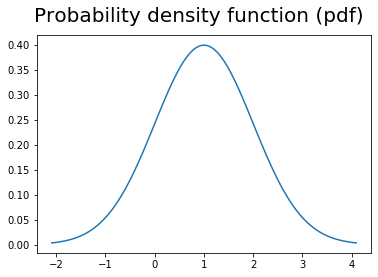

In [3]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1)

mean = 1
std = 1

x = np.linspace(norm.ppf(0.001)+mean, norm.ppf(0.999)+mean, 100)
fig.suptitle('Probability density function (pdf)', fontsize=20)
ax.plot(x, norm.pdf(x,mean,std))

### B. What is the probability that we are actually colliding with the wall, given the prior p(x)?

In [8]:
current_position = 0

coll_prob = norm.cdf(current_position, mean, std)
coll_prob

0.15865525393145707

### C. Fortunately for us (and for the robot), there is a sensor (laser, sonar, etc.) that provides an observation z regarding the distance to the nearest obstacle in front of us. The sensor is not exempt from uncertainty; thus, the likelihood function, p(z|x), is required, i.e., the pdf of z conditioned by the real position of the obstacle, x. The likelihood function is again a Gaussian distribution given by p(z|x) = N (z; x, σ 2 ), with variance σ 2 = 0.2. However, we are interested in the real distance x. Use the Bayes’ theorem to derive the posterior distribution, p(x|z), given an observation z = 0.75 and plot it. For a better comparison, plot the prior distribution, p(x), too.

In [5]:
import math
from scipy import integrate
import numpy as np

In [6]:
# p_x_givex_z = (p_x * p_z_given_x) / p_z

# Prior  estimation of obstacle position
x_range = np.linspace(norm.ppf(0.001)+mean, norm.ppf(0.999)+mean, 100)
mean_prior = 1 # before sensor reading we think that the obstacle is 1 meter away
std_prior = 1
p_x = norm.pdf(x_range,mean_prior,std_prior) 

# Liklihood function, the actual model of sensor (parameter of the sensor model, how noisy is it)
z_range = x_range
observation_sensor = 0.75 #
variance_sensor = 0.2
std_sensor = math.sqrt(variance_sensor)
p_z_given_x = norm.pdf(z_range,observation_sensor,std_sensor)  # pdf of z if x (dist to obstacle) is exactly known

func = lambda x: (norm.pdf(x,mean_prior,std_prior) * norm.pdf(x,observation_sensor,std_sensor)) # p_x * p_z_given_x
p_z, err = integrate.quad(func, -np.inf, np.inf)# INTEGRAL OF (p_x * p_z_given_x) dx
# p_z is a normalization factor, to satisfy the total prob law

p_x_givex_z = (p_x * p_z_given_x) / p_z

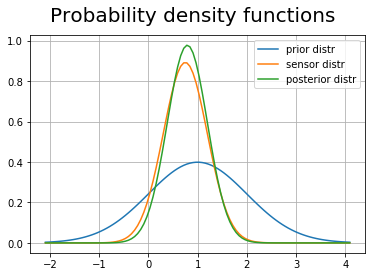

In [7]:
from scipy import integrate
import numpy as np

fig, ax = plt.subplots(1, 1)
fig.suptitle('Probability density functions', fontsize=20)
ax.plot(x, p_x, label='prior distr')
ax.plot(x, p_z_given_x, label='sensor distr')
ax.plot(x, p_x_givex_z, label='posterior distr')
ax.legend()
ax.grid()

### D. Estimate the expected value of the posterior distance to the wall E{x|z} qualitatively by inspection on the plot. The numerical solution is not necessary.

In [44]:
idx = np.where(p_x_givex_z == np.amax(p_x_givex_z))

In [50]:
x[idx[0][0]]

0.781498725826518

### E. Plot the joint probability density function p(x, z)

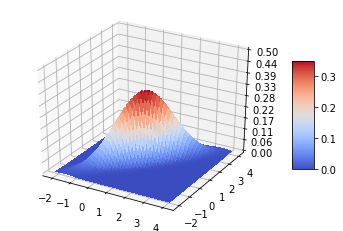

In [68]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


x_range = np.linspace(norm.ppf(0.001)+mean, norm.ppf(0.999)+mean, 100)
z_range = x_range
x, z = np.meshgrid(x_range, z_range)

# p_xz = p_x_givex_z * p_z = p_z_given_x * p_x
joint_prob_xz = (norm.pdf(z,x,std_sensor) * norm.pdf(x,1,std_prior))





fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(x, z, joint_prob_xz, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 0.5)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Task 2

### A. (10 pts) Write the function plot2dcov which plots the 2d contour given three core parameters: mean, covariance, and the iso-contour value k. You may add any other parameter such as color, number of points, etc.

In [117]:
from scipy import array, linalg, dot


def plot2dcov(mean, covariance, k, number_of_points, ax):
    
    L = linalg.cholesky(covariance, lower=True)

    angles = np.linspace(0, 2*np.pi, number_of_points)
    
    x = k*np.cos(angles)
    y = k*np.sin(angles)
    points = np.array([x,y])
    
    projected_points = np.dot(points.T,L.T)
    final_points = projected_points + mean

    ax.set_aspect('equal')
    ax.plot(final_points.T[0], final_points.T[1])

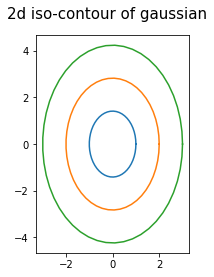

In [118]:
mean = np.array([0,0])
covariance = array([[1,0],[0,2]])
number_of_points = 50

fig, ax = plt.subplots(1, 1)
fig.suptitle('2d iso-contour of gaussian', fontsize=15)

for k in range(1,4):
    plot2dcov(mean, covariance, k, number_of_points, ax)

plt.show()

COMMENTs: variances are dirrefent - therefore we have different variation over diff. axis (different scaling). But the cross correlation is zero - variables are independent.

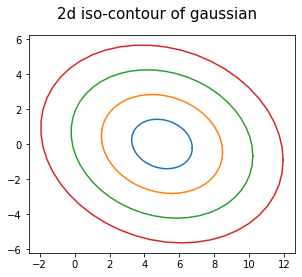

In [186]:
mean = np.array([5,0])
covariance = array([[3,-0.4],[-0.4,2]])
number_of_points = 50

fig, ax = plt.subplots(1, 1)
fig.suptitle('2d iso-contour of gaussian', fontsize=15)

for k in range(1,5):
    plot2dcov(mean, covariance, k, number_of_points, ax)

plt.show()

COMMENTS: small negative correlation

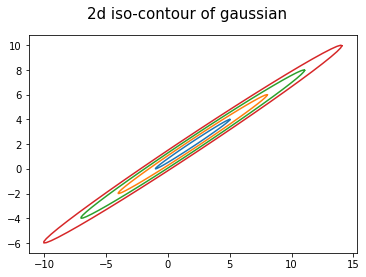

In [187]:
mean = np.array([2,2])
covariance = array([[9.1,6],[6,4]])
number_of_points = 50

fig, ax = plt.subplots(1, 1)
fig.suptitle('2d iso-contour of gaussian', fontsize=15)

for k in range(1,5):
    plot2dcov(mean, covariance, k, number_of_points, ax)

plt.show()

COMMENTS: we have a strong positive correlation

### B. Write the equation, in vector form, for computing the sample mean and covariance matrix of a set of points {xi}

In [8]:
def sample_mean_computing(x):
    return x.mean()

def sample_cov_computing(x,y):
    return np.dot((x - sample_mean_computing(x)).T, (y - sample_mean_computing(y)))/(x.shape[0]-1)

### C. Draw random samples from a multivariate normal distribution. You can use the python function that draws from N (...) the univariate normal distribution ...

mean: [1.95762168 1.97944521]


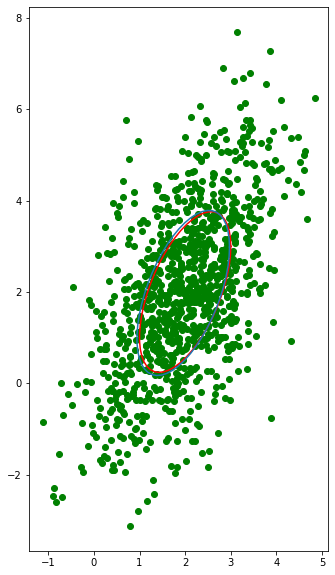

In [33]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
ax.set_aspect('equal')

mu, sigma = 0, 1 # mean and standard deviation
number_of_sampes = 1000
points = np.array([[np.random.normal(mu, sigma, number_of_sampes)], [np.random.normal(mu, sigma, number_of_sampes)]])

# Do the transformation of random points
mean = np.array([2,2])
covariance = np.array([[1, 1.3],[1, 3.1]])
L = linalg.cholesky(covariance, lower=True)
projected_points = np.dot(points.T,L.T)+mean

# Plot transformed random point
ax.plot(projected_points.T[0], projected_points.T[1], 'o',c="green")

# Do the transformation of 1sigma contour
angles = np.linspace(0, 2*np.pi, 50)
x = np.cos(angles)
y = np.sin(angles)
points_1sigma_cont = np.array([x,y])
projected_points_1sigma_cont = np.dot(points_1sigma_cont.T,L.T)+mean
# plot transformed 1sigma contour
ax.plot(projected_points_1sigma_cont.T[0], projected_points_1sigma_cont.T[1], c="red")


# Compute for sample
x = np.squeeze(projected_points.T[0]) # remove dummi dimention
y = np.squeeze(projected_points.T[1])
mean = np.array([sample_mean_computing(x),sample_mean_computing(y)])
covariance = np.array([[sample_cov_computing(x,x), sample_cov_computing(x,y)],[sample_cov_computing(y,x), sample_cov_computing(y,y)]])
plot2dcov(mean, covariance, 1, 50, ax)
print('mean:', mean)


plt.show()

The more number of samples the more close the contours

# Task 3

### A. Draw the propagation state pdf (1-sig...

In [13]:
# our linear model
# state = A * state_prev + B
dt = 0.5
A = np.array([ [(1+dt),0],[0,1] ])
B = np.array([ 2*dt, 0 ])


# time = 0
mean_0 = np.array([0,0])
cov_0 = np.array([ [0.1, 0],[0, 0.1] ])

# # time = 1
# mean_1 = A.dot(mean_0) + B
# cov_1 = A.dot(cov_0.dot(A.T))

In [24]:
A, mean

(array([[1, 0],
        [0, 1]]), array([13.1875,  0.    ]))

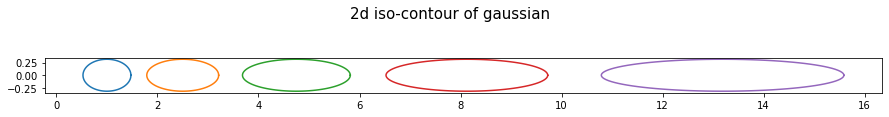

In [14]:
fig, ax = plt.subplots(1, 1)
fig.suptitle('2d iso-contour of gaussian', fontsize=15)
fig.set_size_inches(15,2)

mean = mean_0
covariance = cov_0

for i in range(5):
    mean = A.dot(mean) + B
    covariance = A.dot(covariance.dot(A.T))
    plot2dcov(mean, covariance, 1, 100, ax)

plt.show()

### B. We manage to fix the platform, and now it moves properly. The propagation model is the following...

$y = Ax + Bu + \eta \\
\mu_y = A\mu_x + Bu + \mu_\eta \\
\Sigma_y = A \Sigma_x A^T + A \Sigma_{x\eta} + \Sigma_{\eta x}A^T + \Sigma_\eta
$

But if the mean of $\eta$ is zero, then the things is simplifying:

$\mu_y = A\mu_x + Bu \\
\Sigma_y = A \Sigma_x A^T + \Sigma_\eta
$


How can we use this result iteratively? that is not a problem

### C. Draw the propagation state pdf (1-sigma iso-contour) for times indexes t = 0, . . . , 5 and the control ...

In [53]:
# what we have in the begining
pose_mean = np.array([0,0])
pose_covariance = array([[0.1,0],[0,0.1]])

In [54]:
A = np.array([ [1,0],[0,1] ])
B = np.array([ [dt, 0],[0, dt] ])

u_sequence = np.array([ [3,0], [0,3], [3,0], [0,-3], [3,0] ])

mu_mean = np.array([0,0])
mu_covariance = np.array([ [0.1,0],[0,0.1] ])mu_mean = np.array([0,0])
mu_covariance = np.array([ [0.1,0],[0,0.1] ])

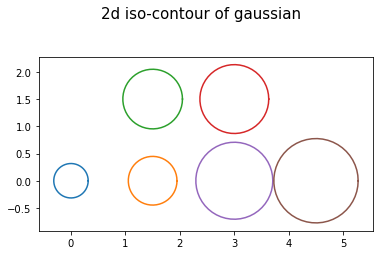

In [55]:
fig, ax = plt.subplots(1, 1)
fig.suptitle('2d iso-contour of gaussian', fontsize=15)

# plot the initial state
number_of_points = 50
plot2dcov(pose_mean, pose_covariance, k, number_of_points, ax)

for u in u_sequence:
    pose_mean = A.dot(pose_mean) + B.dot(u)
    pose_covariance = A.dot(pose_covariance.dot(A.T)) + mu_covariance
    plot2dcov(pose_mean, pose_covariance, k, number_of_points, ax)

plt.show()

### D. Now, suppose that the robotic platform is non holomonic...

In [141]:
# what we have in the begining
pose_mean = np.array([0,0,0])
pose_covariance = array([[0.1,0,0],[0,0.1,0],[0,0,0.5]])

In [142]:
A = np.array([ [1,0,0],[0,1,0],[0,0,1] ])
def B(X):
    return np.array([ [np.cos(X[2])*dt, 0], [np.sin(X[2])*dt, 0], [0,dt] ])
def G(X, u):
    return np.array([[1, 0, -np.sin(X[2]) * dt * u[0]], 
                     [0, 1, np.cos(X[2]) * dt * u[0]], 
                     [0, 0, 1]])

u = np.array([3,2])

mu_mean = np.array([0,0,0])
mu_covariance = np.array([ [0.2,0,0],[0,0.2,0],[0,0,0.1] ])


pose_mean
 [0 0 0]
pose_covariance
 [[0.1 0.  0. ]
 [0.  0.1 0. ]
 [0.  0.  0.5]]

pose_mean
 [1.5 0.  1. ]
pose_covariance
 [[ 1.0965826  -0.5114798  -0.63110324]
 [-0.5114798   0.6284174   0.40522673]
 [-0.63110324  0.40522673  0.6       ]]

pose_mean
 [2.31045346 1.26220648 2.        ]
pose_covariance
 [[ 4.13437369 -0.15939813 -1.44947092]
 [-0.15939813  0.5563065   0.03069458]
 [-1.44947092  0.03069458  0.7       ]]

pose_mean
 [1.6862332  2.62615262 3.        ]
pose_covariance
 [[ 4.97938764  2.20659216 -1.59764693]
 [ 2.20659216  2.2087784  -1.00879754]
 [-1.59764693 -1.00879754  0.8       ]]

pose_mean
 [0.20124446 2.83783263 4.        ]
pose_covariance
 [[ 2.58302811  1.73741657 -0.68948394]
 [ 1.73741657  5.1560106  -1.79316989]
 [-0.68948394 -1.79316989  0.9       ]]


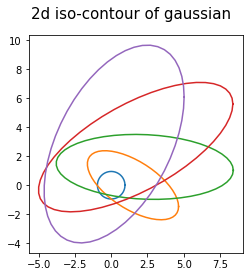

In [143]:
fig, ax = plt.subplots(1, 1)
fig.suptitle('2d iso-contour of gaussian', fontsize=15)

# plot the initial state
number_of_points = 50
print('\npose_mean\n', pose_mean)
print('pose_covariance\n', pose_covariance)
plot2dcov(pose_mean[:2], pose_covariance[:2, :2], k, number_of_points, ax)

for _ in range(4):
    pose_mean = A.dot(pose_mean) + B(pose_mean).dot(u)
    pose_covariance = G(pose_mean,u).dot(pose_covariance.dot(G(pose_mean,u).T)) + mu_covariance
    print('\npose_mean\n', pose_mean)
    print('pose_covariance\n', pose_covariance)
    plot2dcov(pose_mean[:2], pose_covariance[:2, :2], k, number_of_points, ax)

plt.show()

### E. Now repeate the same but the noise is in action space

In [147]:
# what we have in the begining
pose_mean = np.array([0,0,0])
pose_covariance = array([[0.1,0,0],[0,0.1,0],[0,0,0.5]])

In [148]:
A = np.array([ [1,0,0],[0,1,0],[0,0,1] ])
def B(X):
    return np.array([ [np.cos(X[2])*dt, 0], [np.sin(X[2])*dt, 0], [0,dt] ])
def G(X, u):
    return np.array([[1, 0, -np.sin(X[2]) * dt * u[0]], 
                     [0, 1, np.cos(X[2]) * dt * u[0]], 
                     [0, 0, 1]])

u = np.array([3,2])

mu_mean = np.array([0,0])
mu_covariance = np.array([ [2,0],[0,0.1] ])


pose_mean
 [0 0 0]
pose_covariance
 [[0.1 0.  0. ]
 [0.  0.1 0. ]
 [0.  0.  0.5]]

pose_mean
 [1.5 0.  1. ]
pose_covariance
 [[ 1.04254589 -0.28415545 -0.63110324]
 [-0.28415545  0.78245411  0.40522673]
 [-0.63110324  0.40522673  0.525     ]]

pose_mean
 [2.31045346 1.26220648 2.        ]
pose_covariance
 [[ 3.8273999  -0.1851296  -1.34717496]
 [-0.1851296   0.89453029  0.0775111 ]
 [-1.34717496  0.0775111   0.55      ]]

pose_mean
 [1.6862332  2.62615262 3.        ]
pose_covariance
 [[ 4.91242713  1.90203697 -1.46359897]
 [ 1.90203697  1.88713687 -0.73923271]
 [-1.46359897 -0.73923271  0.575     ]]

pose_mean
 [0.20124446 2.83783263 4.        ]
pose_covariance
 [[ 2.5440814   2.10521386 -0.81085682]
 [ 2.10521386  4.17585079 -1.30300034]
 [-0.81085682 -1.30300034  0.6       ]]


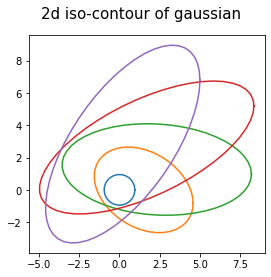

In [149]:
fig, ax = plt.subplots(1, 1)
fig.suptitle('2d iso-contour of gaussian', fontsize=15)

# plot the initial state
number_of_points = 50
print('\npose_mean\n', pose_mean)
print('pose_covariance\n', pose_covariance)
plot2dcov(pose_mean[:2], pose_covariance[:2, :2], k, number_of_points, ax)

for _ in range(4):
    pose_mean = A.dot(pose_mean) + B(pose_mean).dot(u)
    pose_covariance = G(pose_mean,u).dot(pose_covariance.dot(G(pose_mean,u).T)) + B(pose_mean).dot(mu_covariance).dot(B(pose_mean).T)
    print('\npose_mean\n', pose_mean)
    print('pose_covariance\n', pose_covariance)
    plot2dcov(pose_mean[:2], pose_covariance[:2, :2], k, number_of_points, ax)

plt.show()

Variance is a little bit less here compared with the prev case1